# Part II - FordGoBike Data Exploratory Analysis Presentation

## by (Oluwadunsin Olajide)





## Investigation Overview


Ford GoBike is the first bike-sharing system introduced in the US West Coast. Its 540 stations and 7,000 bikes sprawl across five cities in San Francisco Bay Area.The FordGoBike dataset will be used to carry out Exploratory and Explanatory analysis to find insights, patterns and trends from the dataset.
 


## Dataset Overview

The cleaned data used for analysis has the total of 174952 entries of bike trips with 21 columns( the colums gives information about the duration in secs and mins each rider used the bike, start and end time,the day of the week and hours the users used the bike, start and end stations with their latitudes and longitudes, bike id, start and end stations ids, user type( i.e whether the user is a subscriber or customer), bike_share_for_all_trip (this column indicate whether the user is registered for the reduced pricing option), the gender and age.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Load the cleaned dataset
df_biketrip = pd.read_csv('fordgobike_master.csv')

In [3]:
df_biketrip.head()

duration_sec               start_time                  end_time  \
0         52185  2019-02-28 17:32:10.145  2019-03-01 08:01:55.9750   
1         61854  2019-02-28 12:13:13.218  2019-03-01 05:24:08.1460   
2         36490  2019-02-28 17:54:26.010  2019-03-01 04:02:36.8420   
3          1585  2019-02-28 23:54:18.549  2019-03-01 00:20:44.0740   
4          1793  2019-02-28 23:49:58.632  2019-03-01 00:19:51.7600   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              86.0                           Market St at Dolores St   
2             375.0                           Grove St at Masonic Ave   
3               7.0                               Frank H Ogawa Plaza   
4              93.0                      4th St at Mission Bay Blvd S   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.769305              -122.426826             3.0   
2               37.774836              -122.446546            70.0   
3               37.804562              -122.271738           222.0   
4               37.770407              -122.391198           323.0   

                               end_station_name  end_station_latitude  ...  \
0                Commercial St at Montgomery St             37.794231  ...   
1  Powell St BART Station (Market St at 4th St)             37.786375  ...   
2                        Central Ave at Fell St             37.773311  ...   
3                         10th Ave at E 15th St             37.792714  ...   
4                            Broadway at Kearny             37.798014  ...   

    user_type  member_birth_year member_gender  bike_share_for_all_trip  \
0    Customer             1984.0          Male                       No   
1    Customer             1972.0          Male                       No   
2  Subscriber             1989.0         Other                       No   
3  Subscriber             1974.0          Male                      Yes   
4  Subscriber             1959.0          Male                       No   

  start_day_of_week day_in_month time_of_day  start_hour duration_min  \
0          Thursday           28   afternoon          17   869.750000   
1          Thursday           28   afternoon          12  1030.900000   
2          Thursday           28   afternoon          17   608.166667   
3          Thursday           28       night          23    26.416667   
4          Thursday           28       night          23    29.883333   

   member_age  
0          35  
1          47  
2          30  
3          45  
4          60  

[5 rows x 22 columns]

## Distribution of Trips based on User_type

The user type indicate whether the biker user is a subscriber or a customer . The chart below shows that the highest number of trips were taken by the suscribers.Subscribers have a monthly or annual pass (i.e they have either paid for the bike usage for a month or year) while customers have a single-ride or day pass (i.e they pay for the bike usage daily).This makes sense because, subscriber pay less for the trip when compared to the amount paid by the customers. The subscribers don't have to pay unlock fee while the customers pay.



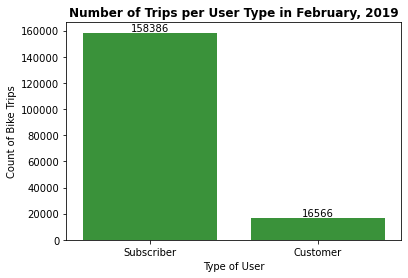

In [4]:
base_color= sb.color_palette()[2]
user_order = df_biketrip['user_type'].value_counts().index
splot= sb.countplot(data=df_biketrip, x='user_type', color=base_color, order= user_order);
plt.bar_label(splot.containers[0],size=10,label_type='edge')
plt.xlabel('Type of User')
plt.ylabel('Count of Bike Trips')
plt.title('Number of Trips per User Type in February, 2019', fontweight='bold');

## Age Distribution of Bike Users

The age distribution of all the bike users in the month of February 2019 is shown in the chart below. The average age of the distribution is 34 years. The age range of users of the bike system with highest bike trips is between 30 - 40 years.

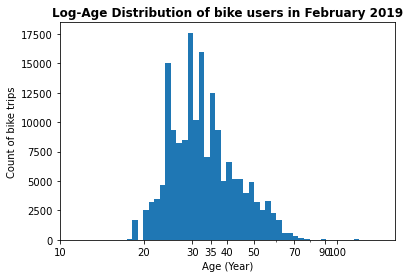

In [5]:
#scale transformation for x-axis to log-type
bins = 10**np.arange(1.2, 2.149 + 0.02, 0.02)
plt.hist(data=df_biketrip, x='member_age', bins= bins);
plt.xscale('log');
plt.xticks([10,20,30,35,40,50,70,90,100], [10,20,30,35,40,50,70,90,100]);
plt.xlabel('Age (Year)')
plt.ylabel('Count of bike trips')
plt.title('Log-Age Distribution of bike users in February 2019', fontweight='bold');

## Duration of Trip

The duartion of trip in minutes was plotted by transforming the x-axis scale to log-scale. it shows a normal distribution with peak around 9-10 minutes. That means the highest number of trips lasted for about 9-10 minutes.

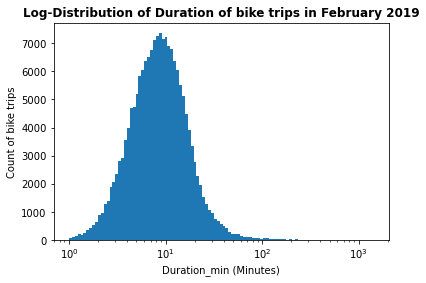

In [6]:
#scale transformation for x-axis to log-type
bins = 10**np.arange(0, 3.14 + 0.03, 0.03)
plt.hist(data=df_biketrip, x='duration_min', bins= bins);
plt.xscale('log');
plt.xticks=[0, 1, 3, 5, 7, 9, 11, 13,15,50,100,0.5e3,1e3,1.5e3],[0,'1','3','5','7','9','11','13','15','50','100','500','1k','1.5k']
plt.xlabel('Duration_min (Minutes)')
plt.ylabel('Count of bike trips')
plt.title('Log-Distribution of Duration of bike trips in February 2019', fontweight='bold');

## Distribution of user type and day of week

The chart below shows how often each category of bike users use the bike during the week all through February 2019.

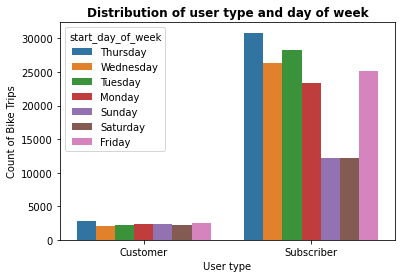

In [7]:
sb.countplot(data=df_biketrip, x= 'user_type', hue='start_day_of_week');
plt.title('Distribution of user type and day of week', fontweight='bold')
plt.xlabel('User type')
plt.ylabel('Count of Bike Trips');

## Age and Duration Distribution with respect to User Type

The duration of trip in mins across the age distribution and user type follow the same trend. there is an interesting finding in the analysis, As few as the customers are, they tend to ride for longer period of time than subscriber.

<Figure size 1296x1296 with 0 Axes>

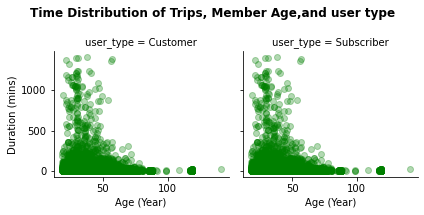

In [8]:
plt.figure(figsize = [18, 18])
g = sb.FacetGrid(data = df_biketrip, col = 'user_type')
g.map(plt.scatter,data = df_biketrip, x = 'member_age', y = 'duration_min', alpha= 0.3, color = 'green')
g.set_xlabels('Age (Year)')
g.set_ylabels('Duration (mins)');
g.fig.suptitle('Time Distribution of Trips, Member Age,and user type', fontweight='bold');
g.fig.tight_layout();

In [9]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_fordgobike_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_fordgobike_slide_deck.ipynb to slides
[NbConvertApp] Writing 672647 bytes to Part_II_fordgobike_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\User\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\User\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\User\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_notebooks
    self.convert_single_notebook(notebook_f